In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500) #changing the printing cap 

Rejected Loans

In [2]:
df = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/ML-loans/RejectStats_2018Q1.csv')
df.drop(['Policy Code'],axis = 1,inplace = True)
df['Debt-To-Income Ratio'] = df['Debt-To-Income Ratio'].str.replace('%', '')  #dropping the % sign 
df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length
0,10000.0,2018-01-01,Other,NaN,100,814xx,CO,< 1 year
1,35000.0,2018-01-01,Credit card refinancing,NaN,100,184xx,PA,< 1 year
2,10000.0,2018-01-01,Credit card refinancing,NaN,100,587xx,ND,< 1 year
3,6000.0,2018-01-01,Credit card refinancing,NaN,100,685xx,NE,< 1 year
4,6000.0,2018-01-01,Debt consolidation,NaN,100,333xx,FL,< 1 year


Unique values of the data

In [3]:
emp = df['Employment Length']
zipc = df['Zip Code']
risk = df['Risk_Score']
request = df["Amount Requested"]
date = df["Application Date"]
loan = df["Loan Title"]
debt = df['Debt-To-Income Ratio']

#When printed will give unique values for each column

zipc.unique()
risk.unique()
debt.unique()
df.State.unique()
date.unique()
loan.unique()
emp.unique()

array(['< 1 year', '1 year', '5 years', 'n/a', '6 years', '4 years',
       '2 years', '10+ years', '8 years', '3 years', '9 years', '7 years'],
      dtype=object)

Missing values

If value != 1875134 --> missing

In [4]:
df.count()

Amount Requested        1875134
Application Date        1875134
Loan Title              1875134
Risk_Score               403720
Debt-To-Income Ratio    1875134
Zip Code                1875134
State                   1875134
Employment Length       1875134
dtype: int64

CATEGORICAL: Loan Title

NUMERICAL: Amount Requested, Debt-To-Income Ratio, 

ORDINAL: Employment Length



In [5]:
#values ready to copy
csv3 = df[['Amount Requested', 'Debt-To-Income Ratio']].copy()

#values that we will need to hot encode
csv2 = df[['Loan Title']].copy()

#values that we will need to process
csv4 = df[['Employment Length']].copy()

In [6]:
csv3.head()

,Amount Requested,Debt-To-Income Ratio
0,10000.0,100
1,35000.0,100
2,10000.0,100
3,6000.0,100
4,6000.0,100


Pre-processing categorical data: Hot encoding Loan Title

In [7]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(csv2)
print(integer_encoded[:20])
print csv2[:20]  #sneaky way of comparing would be printing in case the inverse is not readable

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
#print(inverted)

/Users/ewa_anna_szyszka/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12  3  3  3  4  4  4  4 12  4  4  4  4 10  3  9  3 12  3  4]
                 Loan Title
0                     Other
1   Credit card refinancing
2   Credit card refinancing
3   Credit card refinancing
4        Debt consolidation
5        Debt consolidation
6        Debt consolidation
7        Debt consolidation
8                     Other
9        Debt consolidation
10       Debt consolidation
11       Debt consolidation
12       Debt consolidation
13         Medical expenses
14  Credit card refinancing
15           Major purchase
16  Credit card refinancing
17                    Other
18  Credit card refinancing
19       Debt consolidation


In [ ]:
'''
1 - Business Loan
2 - Car financing
3 - Credit card refinancing, 
4 - Debt consolidation 
5 - Green loan
6 - Home buying
7 - Home improvement
8 - 
9 - Major purchase
10 - Medical expenses
11 - Moving and relocation
12 - other , '''


In [8]:
df_onehot= pd.DataFrame(onehot_encoded)
df_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pre-processing ordinal data: Employment Length

In [9]:
print emp.unique()

csv4.head()

['< 1 year' '1 year' '5 years' 'n/a' '6 years' '4 years' '2 years'
 '10+ years' '8 years' '3 years' '9 years' '7 years']


,Employment Length
0,< 1 year
1,< 1 year
2,< 1 year
3,< 1 year
4,< 1 year


Combining all the data that I will use from the rejected loans dataset

In [10]:
#result is the combined hot encoded Loan Title, Amount Requested and the Debt-To_Income Ratio
csv3
result1 = pd.concat([csv3, df_onehot,csv4], axis=1)
result1['Amount Funded']='0'
result1.head()

,Amount Requested,Debt-To-Income Ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Employment Length,Amount Funded
0,10000.0,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,< 1 year,0
1,35000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 1 year,0
2,10000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 1 year,0
3,6000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 1 year,0
4,6000.0,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 1 year,0


In [11]:
df2 = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/ML-loans/LoanStats_2018Q1.csv')

print len(df.columns)
csv3 = df2[['loan_amnt','int_rate','grade']].copy()
df2.head()

/Users/ewa_anna_szyszka/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


8


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,3100.0,3100.0,3100.0,36 months,9.43%,99.21,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,6.07%,365.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,35000.0,35000.0,35000.0,36 months,12.61%,1172.73,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6025.0,6025.0,6025.0,36 months,9.43%,192.81,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10000.0,10000.0,10000.0,36 months,6.71%,307.45,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2.count()

id                                                 2
member_id                                          0
loan_amnt                                     107864
funded_amnt                                   107864
funded_amnt_inv                               107864
term                                          107864
int_rate                                      107864
installment                                   107864
grade                                         107864
sub_grade                                     107864
emp_title                                      98251
emp_length                                    107864
home_ownership                                107864
annual_inc                                    107864
verification_status                           107864
issue_d                                       107864
loan_status                                   107864
pymnt_plan                                    107864
url                                           

In [13]:
a = df2[['purpose']].copy()  #categorical
b = df2[['emp_length']].copy() #ordinal

#Cleaning the values for employment length
b['emp_length'] = b['emp_length'].str.replace('years', ' ')
b['emp_length'] = b['emp_length'].str.replace('year', ' ')
b['emp_length'] = b['emp_length'].str.replace('10+', '11')
b['emp_length'] = b['emp_length'].str.replace('+', ' ')
b['emp_length'] = b['emp_length'].str.replace('n/a', 'NaN')
b['emp_length'] = b['emp_length'].str.replace('< 1', '0')

c = df2[['loan_amnt','dti','emp_length','total_pymnt']].copy() # amount of loan applied for  #income to debt ratio #emloyment length
c.head()

,loan_amnt,dti,emp_length,total_pymnt
0,3100.0,9.12,10+ years,492.80
1,12000.0,10.99,10+ years,1819.16
2,35000.0,7.61,9 years,5814.61
3,6025.0,19.38,3 years,1127.45
4,10000.0,1.36,10+ years,1543.57


Pre-processing categorical data: Hot encoding the loan purpose

In [14]:
# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(a)
print(integer_encoded2[:20])
print a[:20]  #sneaky way of comparing would be printing in case the inverse is not readable

# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder.fit_transform(integer_encoded2)
#print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
#print(inverted)

[13  3  4  9  3  4  4  4  4  4  5  4  4 10 10  4  3  5  4  3]
               purpose
0             vacation
1          credit_card
2   debt_consolidation
3               moving
4          credit_card
5   debt_consolidation
6   debt_consolidation
7   debt_consolidation
8   debt_consolidation
9   debt_consolidation
10    home_improvement
11  debt_consolidation
12  debt_consolidation
13               other
14               other
15  debt_consolidation
16         credit_card
17    home_improvement
18  debt_consolidation
19         credit_card


In [15]:
df_onehot2= pd.DataFrame(onehot_encoded2)
df_onehot2

'''
1
2 - car
3 - credit_card
4 - debt_consolidation
5 - home_improvement
6 - house
7 - major_purchase
8 - medical
9 - moving
10 - other
11 -  renewable_energy
12 - small_business
13 - vacation 

'''

'\n1\n2 - car\n3 - credit_card\n4 - debt_consolidation\n5 - home_improvement\n6 - house\n7 - major_purchase\n8 - medical\n9 - moving\n10 - other\n11 -  renewable_energy\n12 - small_business\n13 - vacation \n\n'

In [16]:
result = pd.concat([c, df_onehot2], axis=1)
result

,loan_amnt,dti,emp_length,total_pymnt,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3100.0,9.12,10+ years,492.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,12000.0,10.99,10+ years,1819.160000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35000.0,7.61,9 years,5814.610000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6025.0,19.38,3 years,1127.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000.0,1.36,10+ years,1543.570000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25000.0,31.36,10+ years,3588.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3200.0,6.94,1 year,504.820000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7200.0,6.87,8 years,1242.120000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,11000.0,24.95,10+ years,1697.880000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,12000.0,11.48,5 years,1940.220000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Blending the rejected loans and accepted loans datasets together

'''
Legend of the numbers for rejected loans:
(There are too little values encoded under 8, so we drop it)

0 -
1 - Business Loan
2 - Car financing
3 - Credit card refinancing, 
4 - Debt consolidation 
5 - Green loan
6 - Home buying
7 - Home improvement
8 - 
9 - Major purchase
10 - Medical expenses
11 - Moving and relocation
12 - other 
13 - 
14 - 
 '''

In [17]:
result1['Employment Length'] = result1['Employment Length'].str.replace('year', ' ')
result1['Employment Length'] = result1['Employment Length'].str.replace('  s', ' ')
result1['Employment Length'] = result1['Employment Length'].str.replace('10+', '11')
result1['Employment Length'] = result1['Employment Length'].str.replace('+', ' ')
result1['Employment Length'] = result1['Employment Length'].str.replace('n/a', 'NaN')
result1['Employment Length'] = result1['Employment Length'].str.replace('< 1', '0.5')
result1.head()

,Amount Requested,Debt-To-Income Ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Employment Length,Amount Funded
0,10000.0,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0
1,35000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
2,10000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
3,6000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
4,6000.0,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0


In [18]:
d1 = pd.DataFrame(np.zeros((1875134,1)))
d1.rename(columns={0: 'Loan acceptance'}, inplace=True) #Loan 
result1["Loan acceptance"] = d1

#result1.to_csv('rejectz.csv')
result1.head()

,Amount Requested,Debt-To-Income Ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Employment Length,Amount Funded,Loan acceptance
0,10000.0,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0,0.0
1,35000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.0
2,10000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.0
3,6000.0,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.0
4,6000.0,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.0


'''
Legend of the numbers for accepted loans:

0 - 
1 -
2 - car
3 - credit_card
4 - debt_consolidation
5 - home_improvement
6 - house
7 - major_purchase
8 - medical
9 - moving
10 - other
11 -  renewable_energy
12 - small_business
13 - vacation 
14 - 
'''

In [19]:
result['emp_length'] = result['emp_length'].str.replace('years', ' ')
result['emp_length'] = result['emp_length'].str.replace('year', ' ')
result['emp_length'] = result['emp_length'].str.replace('10+', '11')
result['emp_length'] = result['emp_length'].str.replace('+', ' ')
result['emp_length'] = result['emp_length'].str.replace('n/a', 'NaN')
result['emp_length'] = result['emp_length'].str.replace('< 1', '0')

d = pd.DataFrame(np.ones((107866,1))) # 1 if the loan was given
result['Loan acceptance'] = d
result.to_csv('acc.csv')
result.drop(['total_pymnt'],axis=1)
result.head()

,loan_amnt,dti,emp_length,total_pymnt,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Loan acceptance
0,3100.0,9.12,11,492.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,12000.0,10.99,11,1819.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,35000.0,7.61,9,5814.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6025.0,19.38,3,1127.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10000.0,1.36,11,1543.57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


I saved two pre-processed files --> 'accepted.csv' and 'rejects.csv'

Then I merged appropriate columns with each other using excel:

Those are the corresponding columns that were merged
(Some of the columns were dropped in case that there were very little instances of 
taking the loan for that purpose)

Accepted                     Rejects

'loan_amnt'            'Amount Requested'  
'dti'                  'Debt-To-Income Ratio'
'emp_length'            'Employment Length'
'Loan acceptance'       'Loan acceptance'
12                              1
2                               2
3                               3
4                               4
11                              5
6                               6
5                               7
7                               9
8                               10
9                               11
10                              12

In [20]:
dfz = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/even.csv')

#Here I take only the relevant values of the blended 
blended = dfz[['Amount Requested', 'Debt-To-Income Ratio','1','2','3','4','5','6','7','9','10','11','12', 'Employment Length', 'Loan acceptance','Amount Funded']].copy()
blended.rename(columns={'1': "Amount_Funded"}, inplace=True)
blended.rename(columns={'Amount Funded': '1'}, inplace=True)

#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
#blended.to_csv('blended_final.csv')
blended

,Amount Requested,Debt-To-Income Ratio,Amount_Funded,2,3,4,5,6,7,9,10,11,12,Employment Length,Loan acceptance,1
0,10000.0,100.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
1,35000.0,100.00,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2,10000.0,100.00,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
3,6000.0,100.00,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
4,6000.0,100.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
5,2000.0,100.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
6,7500.0,100.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
7,17000.0,100.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
8,2000.0,100.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
9,20000.0,100.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0


In [21]:
blended = blended[np.isfinite(blended['Employment Length'])]
blended = blended[np.isfinite(blended['Amount Requested'])]
blended = blended[np.isfinite(blended['Debt-To-Income Ratio'])]
blended = blended[np.isfinite(blended['1'])]
blended = blended[np.isfinite(blended['2'])]
blended = blended[np.isfinite(blended['3'])]
blended = blended[np.isfinite(blended['4'])]
blended = blended[np.isfinite(blended['5'])]
blended = blended[np.isfinite(blended['6'])]
blended = blended[np.isfinite(blended['7'])]
blended = blended[np.isfinite(blended['9'])]
blended = blended[np.isfinite(blended['10'])]
blended = blended[np.isfinite(blended['11'])]
blended = blended[np.isfinite(blended['12'])]
blended = blended[np.isfinite(blended['Loan acceptance'])]
blended = blended[np.isfinite(blended['Amount_Funded'])]


In [ ]:
1 - Business Loan
2 - Car financing
3 - Credit card refinancing, 
4 - Debt consolidation 
5 - Green loan
6 - Home buying
7 - Home improvement
9 - Major purchase
10 - Medical expenses
11 - Moving and relocation
12 - other 

In [22]:
import seaborn as sb
%matplotlib inline

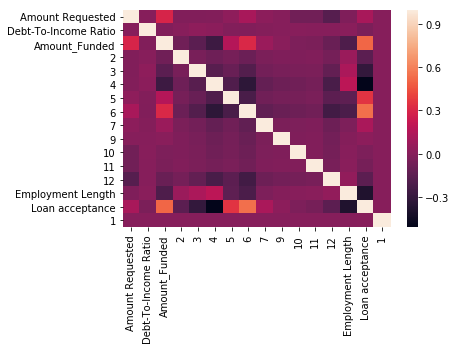

In [23]:
sb.heatmap(blended.corr()) 

In [ ]:
#logistic regression on the reject group


107094    0.0
192609    1.0
33112     0.0
169171    1.0
201014    1.0
Name: Loan acceptance, dtype: float64

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 14)
rfe = rfe.fit(blended[feature_names], y)
print('Selected features: %s' % list(blended[feature_names].columns[rfe.support_]))

Selected features: ['Debt-To-Income Ratio', '1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '12', 'Employment Length', 'Amount Requested']


Selected features: ['1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '12', 'Employment Length']Amount Requested


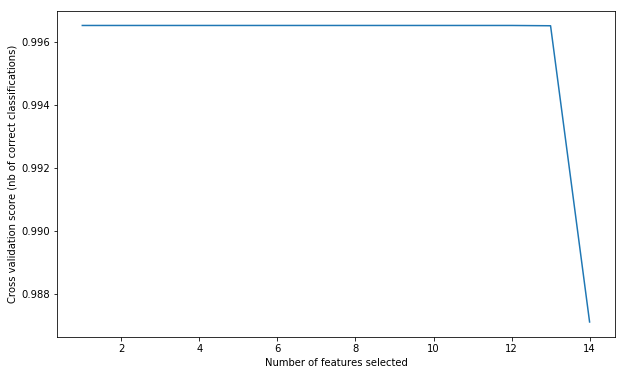

In [32]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(blended[feature_names], y)

#print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(blended[feature_names].columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

feature_names = ['Debt-To-Income Ratio','1','2','3','4','5','6','7','9','10','11','12', 'Employment Length','Amount Requested']


#blended.rename(columns={'Loan acceptance': 'Loan_acceptance'}, inplace=True)
y = blended['Loan acceptance']


X_train, X_test, y_train, y_test = train_test_split(blended[feature_names], y, random_state=0)
y_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
X_test

,Debt-To-Income Ratio,1,2,3,4,5,6,7,9,10,11,12,Employment Length,Amount Requested
107094,21.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,25000.0
192609,23.48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0
33112,29.99,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,35000.0
169171,23.37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7200.0
201014,8.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0
211038,16.17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34000.0
88726,100.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,5600.0
97808,42.23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,12000.0
80851,11.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4500.0
58127,39.02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,15000.0


In [48]:
y_pred = logmodel.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print y_pred  #predicted 
d = {'y predictions': y_pred}
Newy = pd.DataFrame(d)
Newy



[0. 1. 0. ... 0. 0. 0.]


,y predictions
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0


Train/Test split results:
LogisticRegression accuracy is 0.989
LogisticRegression log_loss is 0.079
LogisticRegression auc is 0.993


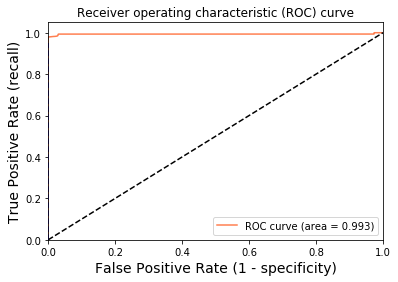

Using a threshold of 0.811 guarantees a sensitivity of 0.951 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = blended[feature_names]
y = y

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
X_test["Amount Requested"] = X_test["Amount Requested"] - 1000
X_test[X_test["Amount Requested"] < 0] = 0
X_test

In [ ]:
y_pred = logmodel.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print y_pred  #predicted 
d = {'y predictions': y_pred}
Newy = pd.DataFrame(d)
Newy

In [ ]:
X_test["Amount Requested"] = X_test["Amount Requested"] - 5000
X_test["Debt-To-Income Ratio"] = 0
X_test[X_test["Amount Requested"] < 0] = 0
X_test

In [ ]:
y_pred = logmodel.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print y_pred  #predicted 
d = {'y predictions': y_pred}
Newy = pd.DataFrame(d)
Newy

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

d = {'one' : y_pred, 'two' : X_test}
ak = pd.DataFrame(d)
ak.head()

In [ ]:
plt.figure(figsize=(15,8))

%seaborn inline

ax = sb.kdeplot(y_train[y_train.Loan_acceptance == 1], color="darkturquoise", shade=True)
sb.kdeplot(y_train[y_train.Loan_acceptance == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.hist(blended["Amount Requested"])

plt.hist(result['loan_amnt'].dropna())


In [ ]:
plt.hist(result1['Amount Requested'].dropna())

In [ ]:

X_test.dropna()
y_train.dropna()
y_test.dropna()

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.dropna())
X_test = scaler.transform(X_test.dropna())'''

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

classify --> loan 50000 100000 150000 200000 250000 300000

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 5)

In [ ]:
print blended.columns[2]

In [ ]:
blended['cluster'] = cluster.fit_predict(blended[blended.columns])

In [ ]:
#result == accepted 
#result1 == rejects

result['loan_amnt'].append(result1['Amount Requested'])
result['dti'].append( result1['Debt-To-Income Ratio'])
result['emp_length'].append( result1['Employment Length'])
result[12].append(result1[1]) #Business loan
result[2].append(result1[2])  #car
result[3].append(result1[3])  #Credit_card_refinancing

result[4].append(result1[4]) #Debt_consolidation
result[11].append(result1[5]) #Green_loan
result[6].append(result1[6]) #Home_buying
result[5].append(result1[7]) #Home_improvement
result[7].append(result1[9]) #Major_purchase
result[8].append(result1[10]) #Medical_expenses
result[9].append(result1[11]) #Moving_and_relocation
result[10].append(result1[12]) #Other
result['Loan acceptance'].append(result1['Loan acceptance'])  #Loan_yes_no

#print result['Loan acceptance'].append(result1['Loan acceptance'])

final = pd.concat([result['loan_amnt'],result['dti'],result['emp_length'], result[12],
                  result[2],result[3],result[4],result[11],result[6],result[5],result[7],result[8],
                  result[9],result[10],result['Loan acceptance']], axis=1)


dat = pd.DataFrame()# result['loan_amnt']

dat['lo'] = result['dti']
dat['a'] = result['Loan acceptance']
print dat['a'].unique()


dat.head()

In [ ]:
print result[2]  #the number at the end 107866 looks good, this is how muh it should be if you stack things on top

In [ ]:
request = [result['loan_amnt'], result1['Amount Requested']]
dti = [result['dti'], result1['Debt-To-Income Ratio']]
employ = [result['emp_length'], result1['Employment Length']]
Business_Loan = [result[12], result1[1]]
car = [result[2], result1[2]]
Credit_card_refinancing = [result[3], result1[3]]
Debt_consolidation = [result[4], result1[4]]
Green_loan = [result[11], result1[5]]
Home_buying = [result[6], result1[6]]
Home_improvement = [result[5], result1[7]]
Major_purchase =[result[7], result1[9]]
Medical_expenses = [result[8], result1[10]]
Moving_and_relocation =[result[9], result1[11]]
Other = [result[10], result1[12]]
Loan_yes_no = [result['Loan acceptance'], result1['Loan acceptance']]

#z = pd.concat(Business_Loan)
final = pd.concat(request, axis=1)
print request
#print final #loan amount for all people 